# Perkenalan Dataset

Sumber Dataset: https://www.kaggle.com/datasets/atharvaingle/crop-recommendation-dataset/data

In [103]:
!pip install mlflow

# Import Library

In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mlflow
import mlflow.sklearn
mlflow.set_tracking_uri("https://dagshub.com/AzimaF/membangun_sistem_machine_learning.mlflow")

import os

# Ganti dengan token DagsHub kamu
os.environ["MLFLOW_TRACKING_USERNAME"] = "AzimaF"
os.environ["MLFLOW_TRACKING_PASSWORD"] = "a6fd2ef52a2527e3b4d345307141e1f2cf8e1182"

mlflow.set_tracking_uri("https://dagshub.com/AzimaF/membangun_sistem_machine_learning.mlflow")
mlflow.set_experiment("RandomForest_Classifier")  # Optional, bisa juga pakai nama lain

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Data Understanding

In [105]:
crop_recom = pd.read_csv('Crop_recommendation.csv')

crop_recom

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [106]:
crop_recom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [107]:
# Memeriksa tipe data setiap kolom
data_types = crop_recom.dtypes

# Menentukan apakah kolom adalah numerikal atau kategorikal
column_types = {}
for column, dtype in data_types.items():
    if dtype == 'object':  # Kategorikal
        column_types[column] = 'Kategorikal'
    else:  # Numerikal
        column_types[column] = 'Numerikal'

# Menampilkan hasil dalam bentuk DataFrame
df_column_types = pd.DataFrame(list(column_types.items()), columns=['Kolom', 'Tipe Data'])
print(df_column_types)

         Kolom    Tipe Data
0            N    Numerikal
1            P    Numerikal
2            K    Numerikal
3  temperature    Numerikal
4     humidity    Numerikal
5           ph    Numerikal
6     rainfall    Numerikal
7        label  Kategorikal


In [108]:
crop_recom.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


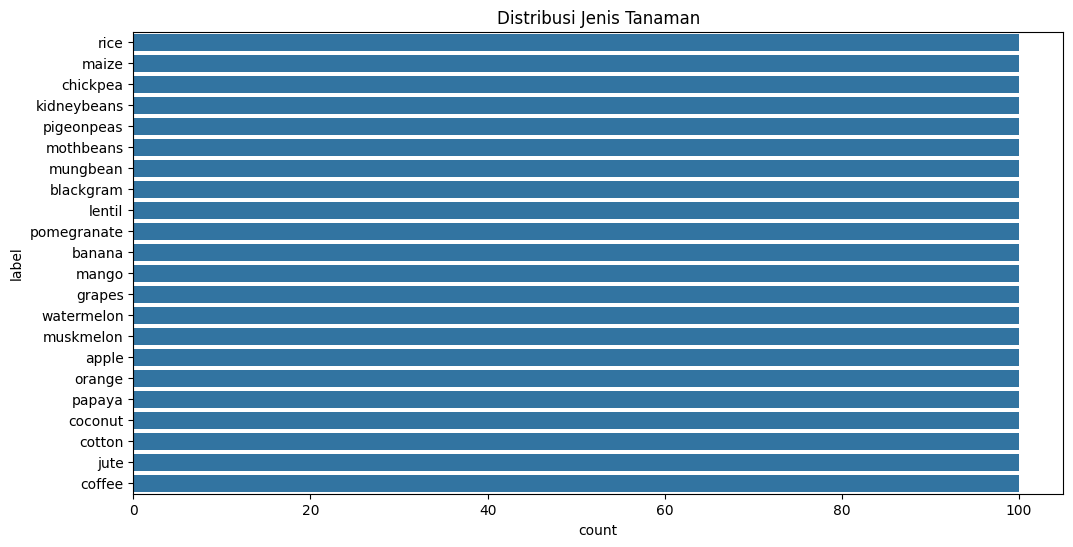

In [109]:
plt.figure(figsize=(12, 6))
sns.countplot(data=crop_recom, y='label', order=crop_recom['label'].value_counts().index)
plt.title("Distribusi Jenis Tanaman")
plt.show()

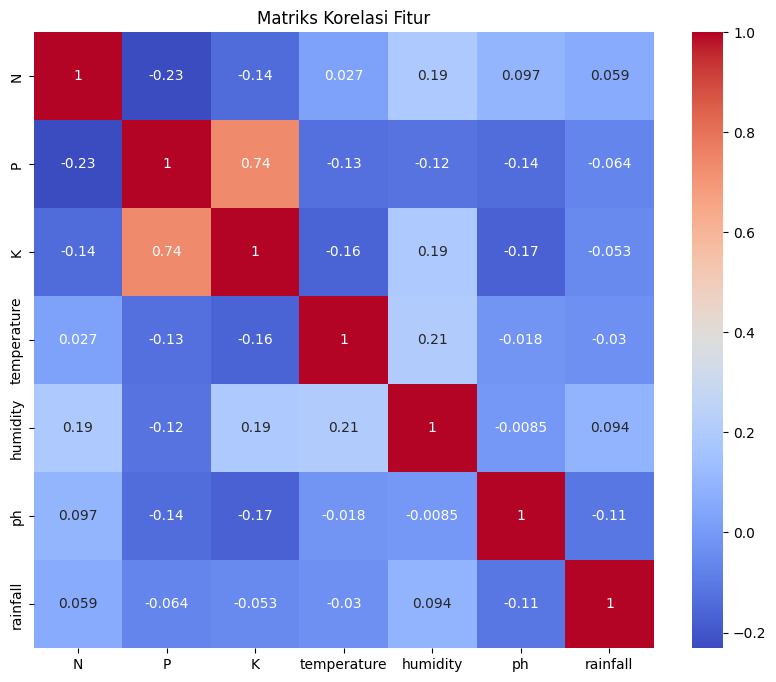

In [110]:
# Korelasi antar fitur
plt.figure(figsize=(10, 8))
# Drop the non-numeric 'label' column before calculating correlation
corr = crop_recom.drop('label', axis=1).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Matriks Korelasi Fitur")
plt.show()

In [111]:
# Pengecekan Outliers menggunakan IQR
def detect_outliers(crop_recom, column):
    Q1 = crop_recom[column].quantile(0.25)
    Q3 = crop_recom[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = crop_recom[(crop_recom[column] < lower_bound) | (crop_recom[column] > upper_bound)][column]
    return len(outliers), lower_bound, upper_bound

print("\nPengecekan Outliers:")
for column in crop_recom.select_dtypes(include=[np.number]).columns:
    count, lower, upper = detect_outliers(crop_recom, column)
    print(f"Kolom {column}: {count} outliers (Batas bawah: {lower:.2f}, Batas atas: {upper:.2f})")


Pengecekan Outliers:
Kolom N: 0 outliers (Batas bawah: -73.88, Batas atas: 179.12)
Kolom P: 138 outliers (Batas bawah: -32.00, Batas atas: 128.00)
Kolom K: 200 outliers (Batas bawah: -23.50, Batas atas: 92.50)
Kolom temperature: 86 outliers (Batas bawah: 14.08, Batas atas: 37.25)
Kolom humidity: 30 outliers (Batas bawah: 15.73, Batas atas: 134.48)
Kolom ph: 57 outliers (Batas bawah: 4.54, Batas atas: 8.35)
Kolom rainfall: 100 outliers (Batas bawah: -25.02, Batas atas: 213.84)


In [112]:
# Pengecekan Skewness
print("\nSkewness Fitur Numerik:")
skewness = crop_recom.select_dtypes(include=[np.number]).skew()
print(skewness)


Skewness Fitur Numerik:
N              0.509721
P              1.010773
K              2.375167
temperature    0.184933
humidity      -1.091708
ph             0.283929
rainfall       0.965756
dtype: float64


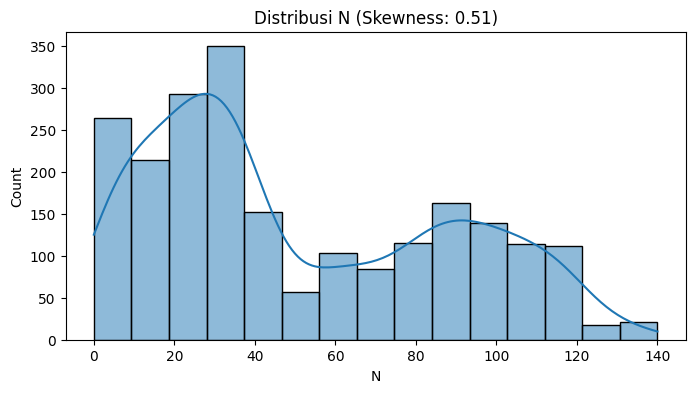

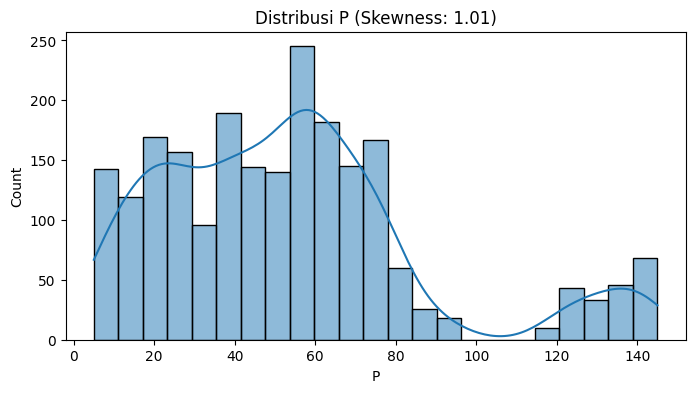

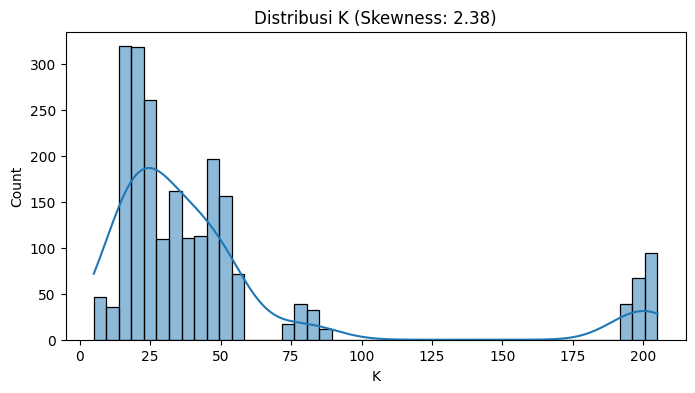

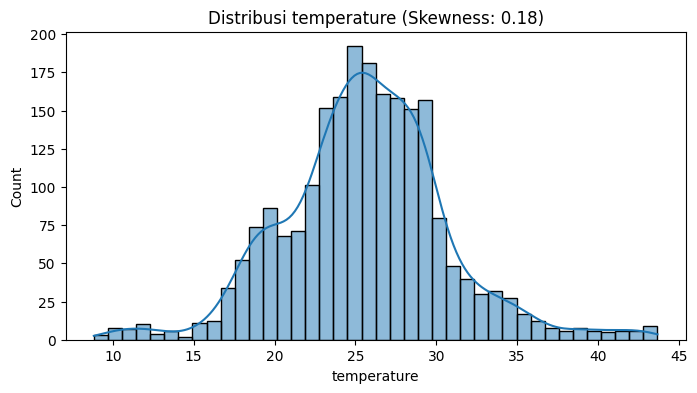

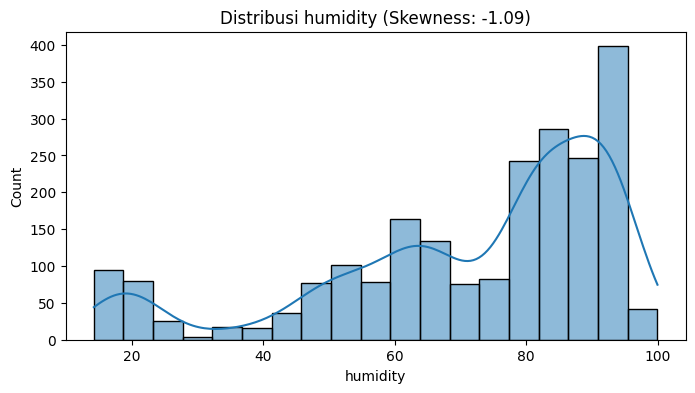

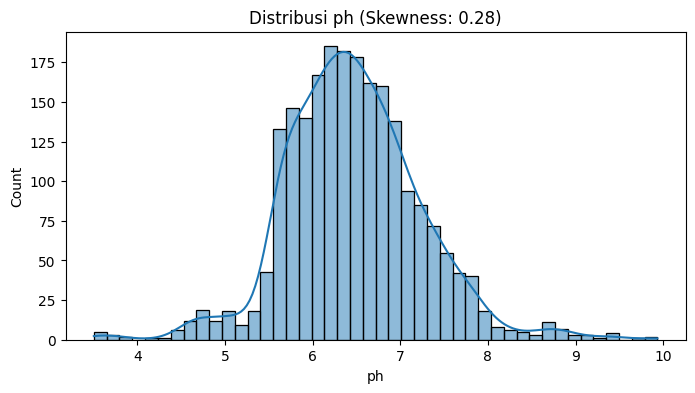

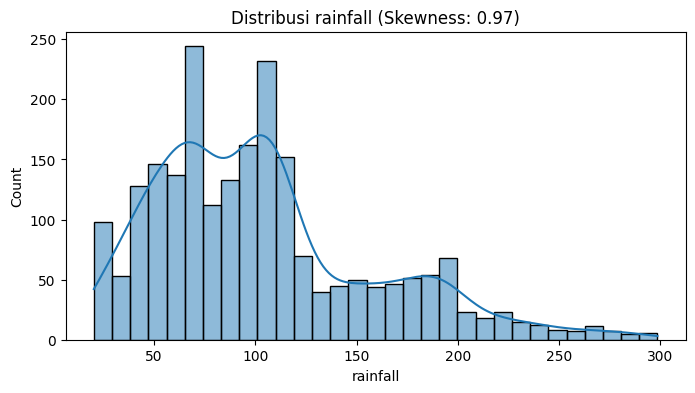

In [113]:
for column in crop_recom.select_dtypes(include=[np.number]).columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(crop_recom[column], kde=True)
    plt.title(f"Distribusi {column} (Skewness: {crop_recom[column].skew():.2f})")
    plt.show()

# Data Preparation

In [114]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Di bagian training

# Cek nilai mean dan standar deviasi:
print("Mean per fitur:", scaler.mean_)
print("Standard deviation per fitur:", scaler.scale_)

Mean per fitur: [ 50.55181818  53.36272727  48.14909091  25.61624385  71.48177922
   6.46948007 103.46365542]
Standard deviation per fitur: [36.90894258 32.97838509 50.63641835  5.06259762 22.25875106  0.77376177
 54.94589656]


In [115]:
# Memisahkan fitur dan target
X = crop_recom.drop('label', axis=1)
y = crop_recom['label']

# Standarisasi fitur numerik
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Modelling

## Latih Model RandomForest

In [116]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

model = RandomForestClassifier(n_estimators=50, random_state=42, max_depth=15)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=15, n_estimators=50, random_state=42)

In [117]:
# Prediksi pada data test
y_pred = model.predict(X_test)

# Evaluasi model
print("Akurasi:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Akurasi: 0.9954545454545455

Classification Report:
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        20
      banana       1.00      1.00      1.00        20
   blackgram       1.00      0.95      0.97        20
    chickpea       1.00      1.00      1.00        20
     coconut       1.00      1.00      1.00        20
      coffee       1.00      1.00      1.00        20
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        20
        jute       0.95      1.00      0.98        20
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      1.00      1.00        20
       maize       0.95      1.00      0.98        20
       mango       1.00      1.00      1.00        20
   mothbeans       1.00      1.00      1.00        20
    mungbean       1.00      1.00      1.00        20
   muskmelon       1.00      1.00      1.00        20
      orange       1.00      

# Evaluation

In [118]:
from sklearn.metrics import accuracy_score, f1_score, ConfusionMatrixDisplay
# Evaluasi
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

rf_train_acc = accuracy_score(y_train, y_train_pred)
rf_test_acc = accuracy_score(y_test, y_test_pred)
rf_train_f1 = f1_score(y_train, y_train_pred, average='weighted')
rf_test_f1 = f1_score(y_test, y_test_pred, average='weighted')

print(f"Random Forest - Training Accuracy: {rf_train_acc:.2%}, F1-Score: {rf_train_f1:.2%}")
print(f"Random Forest - Testing Accuracy: {rf_test_acc:.2%}, F1-Score: {rf_test_f1:.2%}")

Random Forest - Training Accuracy: 100.00%, F1-Score: 100.00%
Random Forest - Testing Accuracy: 99.55%, F1-Score: 99.55%


In [119]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(RandomForestClassifier(random_state=42), X, y, cv=5, scoring='f1_weighted')
print(f"RF Cross-Validation F1-Score: {scores.mean():.2%}")

RF Cross-Validation F1-Score: 99.45%


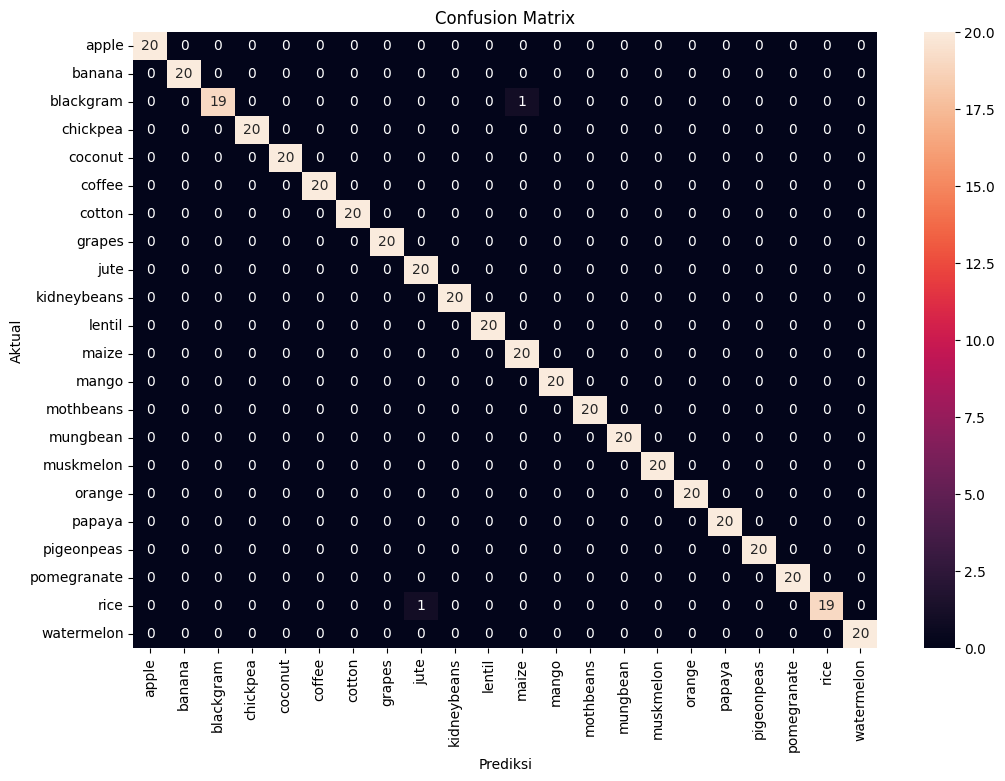

In [120]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.title("Confusion Matrix")
plt.show()

# Masukkan ke DagsHub

In [121]:
with mlflow.start_run():
    # ---------------------
    # Inisialisasi Model
    # ---------------------
    model = RandomForestClassifier(
        n_estimators=50,
        random_state=42,
        max_depth=15
    )
    model.fit(X_train, y_train)

    # ---------------------
    # Prediksi dan Evaluasi
    # ---------------------
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    rf_train_acc = accuracy_score(y_train, y_train_pred)
    rf_test_acc = accuracy_score(y_test, y_test_pred)
    rf_train_f1 = f1_score(y_train, y_train_pred, average='weighted')
    rf_test_f1 = f1_score(y_test, y_test_pred, average='weighted')

    # ---------------------
    # Logging Parameters
    # ---------------------
    mlflow.log_param("model_type", "RandomForestClassifier")
    mlflow.log_param("n_estimators", 50)
    mlflow.log_param("random_state", 42)
    mlflow.log_param("max_depth", 15)

    # Jika ingin semua param otomatis:
    # for key, value in model.get_params().items():
    #     mlflow.log_param(key, value)

    # ---------------------
    # Logging Metrics
    # ---------------------
    mlflow.log_metric("train_accuracy", rf_train_acc)
    mlflow.log_metric("test_accuracy", rf_test_acc)
    mlflow.log_metric("train_f1_score", rf_train_f1)
    mlflow.log_metric("test_f1_score", rf_test_f1)

    # ---------------------
    # (Opsional) Simpan Artifak Lokal
    # ---------------------
    import joblib
    import os
    os.makedirs("models", exist_ok=True)
    joblib.dump(model, "models/random_forest_model.pkl")
    mlflow.log_artifact("models/random_forest_model.pkl")

🏃 View run gaudy-seal-333 at: https://dagshub.com/AzimaF/membangun_sistem_machine_learning.mlflow/#/experiments/1/runs/d28b2cfed1454787a80e100a68897c84
🧪 View experiment at: https://dagshub.com/AzimaF/membangun_sistem_machine_learning.mlflow/#/experiments/1


# Inference

In [122]:
import pandas as pd
import joblib
from sklearn.preprocessing import StandardScaler

# Load model yang sudah dilatih
model = joblib.load("models/random_forest_model.pkl")

scaler = StandardScaler()
scaler.mean_ = [50.5, 53.4, 48.1, 25.6, 71.5, 6.5, 103.5]
scaler.scale_ = [37.0, 33.0, 50.6, 5.0, 22.3, 0.8, 55.0]
scaler.var_ = [s**2 for s in scaler.scale_]

# Fungsi input pengguna
def input_user():
    print("Silakan masukkan nilai untuk masing-masing fitur:")
    N = float(input("N (Nitrogen): "))
    P = float(input("P (Phosphorus): "))
    K = float(input("K (Potassium): "))
    temperature = float(input("Temperature (°C): "))
    humidity = float(input("Humidity (%): "))
    ph = float(input("pH tanah): "))
    rainfall = float(input("Rainfall (mm): "))
    return [[N, P, K, temperature, humidity, ph, rainfall]]

# Prediksi
user_input = input_user()
scaled_input = scaler.transform(user_input)
predicted_crop = model.predict(scaled_input)
print("\n🌱 Jenis tanaman yang direkomendasikan:", predicted_crop[0])

Silakan masukkan nilai untuk masing-masing fitur:
N (Nitrogen): 20
P (Phosphorus): 30
K (Potassium): 35
Temperature (°C): 30.3
Humidity (%): 70.5
pH tanah): 5.5
Rainfall (mm): 100.3

🌱 Jenis tanaman yang direkomendasikan: mango


# Mengeksport Data

In [123]:
# Export prediksi ke file CSV
def export_predictions_to_csv(data, predictions, filename="crop_prepocessing.csv"):
    # Membuat DataFrame dari data input dan prediksi
    columns = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
    df_predictions = pd.DataFrame(data, columns=columns)
    df_predictions['predicted_crop'] = predictions
    # Menyimpan ke CSV
    df_predictions.to_csv(filename, index=False)
    print(f"Prediksi telah diekspor ke {filename}")

# Ekspor prediksi contoh ke CSV
export_predictions_to_csv(new_data, predicted_crop)

Prediksi telah diekspor ke crop_prepocessing.csv


# Download Hasil Data Preprocessing

In [124]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [125]:
!zip -r pre_dataset.zip crop_prepocessing.csv

updating: crop_prepocessing.csv (deflated 5%)


In [126]:
from google.colab import files
files.download('pre_dataset.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>